___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [46]:
import seaborn as sns

In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = '2006-01-01'
end = '2016-01-01'

In [5]:
JCI = data.DataReader("^JCI", 'stooq', start, end)
KLCI = data.DataReader("^KLCI", 'stooq', start, end)
NZ50 = data.DataReader("^NZ50", 'stooq', start, end)
SHC = data.DataReader("^SHC", 'stooq', start, end)
STI = data.DataReader("^STI", 'stooq', start, end)
TWSE = data.DataReader("^TWSE", 'stooq', start, end)



In [6]:
TWSE

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,8273.77,8338.06,8258.73,8338.06,1.199528e+09
2015-12-30,8313.37,8342.34,8262.52,8279.99,1.308249e+09
2015-12-29,8313.37,8342.34,8268.81,8274.69,1.196770e+09
2015-12-28,8374.18,8394.60,8358.49,8358.49,1.295105e+09
2015-12-25,8328.94,8364.30,8320.10,8363.28,1.243689e+09
...,...,...,...,...,...
2006-01-06,6757.41,6761.01,6676.65,6694.82,4.864665e+09
2006-01-05,6669.80,6717.12,6666.84,6709.87,4.901373e+09
2006-01-04,6658.32,6670.96,6579.66,6616.44,4.987459e+09


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [30]:
tickers = ['JCI','KLCI','NZ50','SHC','STI','TWSE']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [9]:
bank_stocks = pd.concat([JCI,KLCI,NZ50,SHC,STI,TWSE],keys=tickers,axis=1)
bank_stocks

JCI                                KLCI                    \
               Open     High      Low    Close     Open     High      Low   
Date                                                                        
2006-01-02  1161.78  1171.71  1161.30  1171.71      NaN      NaN      NaN   
2006-01-03  1170.09  1186.46  1170.09  1184.69   899.18   899.85   891.04   
2006-01-04  1188.25  1211.70  1188.25  1211.70   893.09   897.88   892.63   
2006-01-05  1213.15  1221.17  1204.96  1211.00   897.34   908.71   897.34   
2006-01-06  1210.22  1225.00  1205.74  1222.25   906.60   912.07   906.60   
...             ...      ...      ...      ...      ...      ...      ...   
2015-12-25      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2015-12-28  4512.30  4568.13  4511.62  4557.35  1659.57  1674.98  1658.80   
2015-12-29  4552.14  4569.36  4552.10  4569.36  1674.89  1686.40  1674.89   
2015-12-30  4574.06  4595.51  4571.76  4593.01  1686.95  1706.25  1686.85   
2015-12-31      NaN      NaN      NaN      NaN  1695.70  1697.43  1688.74   

                                     NZ50  ...      STI                    \
              Close       Volume     Open  ...     Open     High      Low   
Date                                       ...                              
2006-01-02      NaN          NaN      NaN  ...      NaN      NaN      NaN   
2006-01-03   892.85   24188100.0      NaN  ...  2354.59  2373.15  2353.40   
2006-01-04   897.13   44205900.0  3370.51  ...  2383.83  2396.58  2382.13   
2006-01-05   906.66   85141696.0  3374.46  ...  2392.52  2414.74  2392.41   
2006-01-06   911.67   89863600.0  3375.98  ...  2407.13  2423.43  2401.54   
...             ...          ...      ...  ...      ...      ...      ...   
2015-12-25      NaN          NaN      NaN  ...      NaN      NaN      NaN   
2015-12-28  1670.73  122140704.0      NaN  ...  2883.80  2889.14  2869.69   
2015-12-29  1685.36  126010400.0  6225.53  ...  2880.91  2890.85  2877.22   
2015-12-30  1693.14  125471696.0  6292.44  ...  2894.31  2897.47  2868.81   
2015-12-31  1692.51   84166200.0  6319.38  ...  2884.96  2891.25  2879.25   

                                     TWSE                             \
              Close       Volume     Open     High      Low    Close   
Date                                                                   
2006-01-02      NaN          NaN  6457.61  6492.92  6424.03  6462.06   
2006-01-03  2369.37          NaN  6476.20  6591.77  6457.09  6591.77   
2006-01-04  2384.13          NaN  6658.32  6670.96  6579.66  6616.44   
2006-01-05  2403.75          NaN  6669.80  6717.12  6666.84  6709.87   
2006-01-06  2420.74          NaN  6757.41  6761.01  6676.65  6694.82   
...             ...          ...      ...      ...      ...      ...   
2015-12-25      NaN          NaN  8328.94  8364.30  8320.10  8363.28   
2015-12-28  2875.32  105191696.0  8374.18  8394.60  8358.49  8358.49   
2015-12-29  2888.22  102207000.0  8313.37  8342.34  8268.81  8274.69   
2015-12-30  2885.51  170518592.0  8313.37  8342.34  8262.52  8279.99   
2015-12-31  2882.73   93015200.0  8273.77  8338.06  8258.73  8338.06   

                          
                  Volume  
Date                      
2006-01-02  3.838232e+09  
2006-01-03  4.303800e+09  
2006-01-04  4.987459e+09  
2006-01-05  4.901373e+09  
2006-01-06  4.864665e+09  
...                  ...  
2015-12-25  1.243689e+09  
2015-12-28  1.295105e+09  
2015-12-29  1.196770e+09  
2015-12-30  1.308249e+09  
2015-12-31  1.199528e+09  

[2603 rows x 28 columns]

** Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks

Bank Ticker      JCI                                KLCI                    \
Stock Info      Open     High      Low    Close     Open     High      Low   
Date                                                                         
2006-01-02   1161.78  1171.71  1161.30  1171.71      NaN      NaN      NaN   
2006-01-03   1170.09  1186.46  1170.09  1184.69   899.18   899.85   891.04   
2006-01-04   1188.25  1211.70  1188.25  1211.70   893.09   897.88   892.63   
2006-01-05   1213.15  1221.17  1204.96  1211.00   897.34   908.71   897.34   
2006-01-06   1210.22  1225.00  1205.74  1222.25   906.60   912.07   906.60   
...              ...      ...      ...      ...      ...      ...      ...   
2015-12-25       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2015-12-28   4512.30  4568.13  4511.62  4557.35  1659.57  1674.98  1658.80   
2015-12-29   4552.14  4569.36  4552.10  4569.36  1674.89  1686.40  1674.89   
2015-12-30   4574.06  4595.51  4571.76  4593.01  1686.95  1706.25  1686.85   
2015-12-31       NaN      NaN      NaN      NaN  1695.70  1697.43  1688.74   

Bank Ticker                           NZ50  ...      STI                    \
Stock Info     Close       Volume     Open  ...     Open     High      Low   
Date                                        ...                              
2006-01-02       NaN          NaN      NaN  ...      NaN      NaN      NaN   
2006-01-03    892.85   24188100.0      NaN  ...  2354.59  2373.15  2353.40   
2006-01-04    897.13   44205900.0  3370.51  ...  2383.83  2396.58  2382.13   
2006-01-05    906.66   85141696.0  3374.46  ...  2392.52  2414.74  2392.41   
2006-01-06    911.67   89863600.0  3375.98  ...  2407.13  2423.43  2401.54   
...              ...          ...      ...  ...      ...      ...      ...   
2015-12-25       NaN          NaN      NaN  ...      NaN      NaN      NaN   
2015-12-28   1670.73  122140704.0      NaN  ...  2883.80  2889.14  2869.69   
2015-12-29   1685.36  126010400.0  6225.53  ...  2880.91  2890.85  2877.22   
2015-12-30   1693.14  125471696.0  6292.44  ...  2894.31  2897.47  2868.81   
2015-12-31   1692.51   84166200.0  6319.38  ...  2884.96  2891.25  2879.25   

Bank Ticker                           TWSE                             \
Stock Info     Close       Volume     Open     High      Low    Close   
Date                                                                    
2006-01-02       NaN          NaN  6457.61  6492.92  6424.03  6462.06   
2006-01-03   2369.37          NaN  6476.20  6591.77  6457.09  6591.77   
2006-01-04   2384.13          NaN  6658.32  6670.96  6579.66  6616.44   
2006-01-05   2403.75          NaN  6669.80  6717.12  6666.84  6709.87   
2006-01-06   2420.74          NaN  6757.41  6761.01  6676.65  6694.82   
...              ...          ...      ...      ...      ...      ...   
2015-12-25       NaN          NaN  8328.94  8364.30  8320.10  8363.28   
2015-12-28   2875.32  105191696.0  8374.18  8394.60  8358.49  8358.49   
2015-12-29   2888.22  102207000.0  8313.37  8342.34  8268.81  8274.69   
2015-12-30   2885.51  170518592.0  8313.37  8342.34  8262.52  8279.99   
2015-12-31   2882.73   93015200.0  8273.77  8338.06  8258.73  8338.06   

Bank Ticker                
Stock Info         Volume  
Date                       
2006-01-02   3.838232e+09  
2006-01-03   4.303800e+09  
2006-01-04   4.987459e+09  
2006-01-05   4.901373e+09  
2006-01-06   4.864665e+09  
...                   ...  
2015-12-25   1.243689e+09  
2015-12-28   1.295105e+09  
2015-12-29   1.196770e+09  
2015-12-30   1.308249e+09  
2015-12-31   1.199528e+09  

[2603 rows x 28 columns]

** Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2603 entries, 2006-01-02 to 2015-12-31
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (JCI, Open)     2437 non-null   float64
 1   (JCI, High)     2437 non-null   float64
 2   (JCI, Low)      2437 non-null   float64
 3   (JCI, Close)    2437 non-null   float64
 4   (KLCI, Open)    2457 non-null   float64
 5   (KLCI, High)    2457 non-null   float64
 6   (KLCI, Low)     2457 non-null   float64
 7   (KLCI, Close)   2457 non-null   float64
 8   (KLCI, Volume)  2455 non-null   float64
 9   (NZ50, Open)    2514 non-null   float64
 10  (NZ50, High)    2514 non-null   float64
 11  (NZ50, Low)     2514 non-null   float64
 12  (NZ50, Close)   2514 non-null   float64
 13  (NZ50, Volume)  2510 non-null   float64
 14  (SHC, Open)     2429 non-null   float64
 15  (SHC, High)     2429 non-null   float64
 16  (SHC, Low)      2429 non-null   float64
 17  (SHC, Close)   

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [16]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
JCI     5523.29
KLCI    1892.65
NZ50    6324.26
SHC     6092.06
STI     3875.77
TWSE    9973.12
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [38]:
returnz = pd.DataFrame()


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [39]:
for tick in tickers:
    returnz[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()

,JCI Returns,KLCI Returns,NZ50 Returns,SHC Returns,STI Returns,TWSE Returns
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.011078,NaN,NaN,NaN,NaN,0.020073
2006-01-04,0.022799,0.004794,NaN,NaN,0.006230,0.003743
2006-01-05,-0.000578,0.010623,0.000450,0.013811,0.008229,0.014121
2006-01-06,0.009290,0.005526,-0.003261,0.010148,0.007068,-0.002243
...,...,...,...,...,...,...
2015-12-25,0.000000,0.000000,0.000000,0.004269,0.000000,0.004675
2015-12-28,0.007672,0.004340,0.000000,-0.025946,-0.000799,-0.000573
2015-12-29,0.002635,0.008757,0.010748,0.008478,0.004486,-0.010026


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

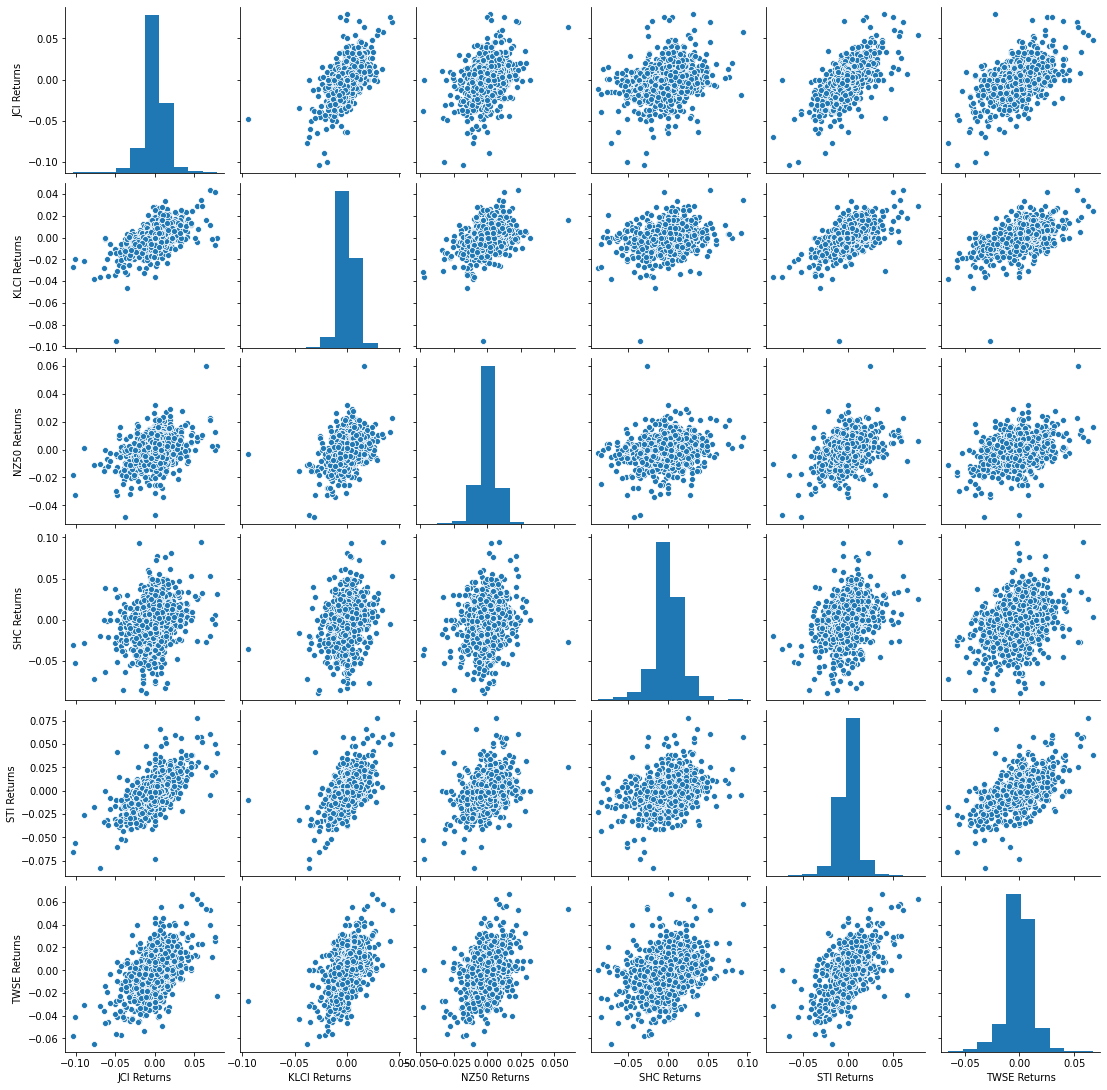

In [48]:
sns.pairplot(returnz)

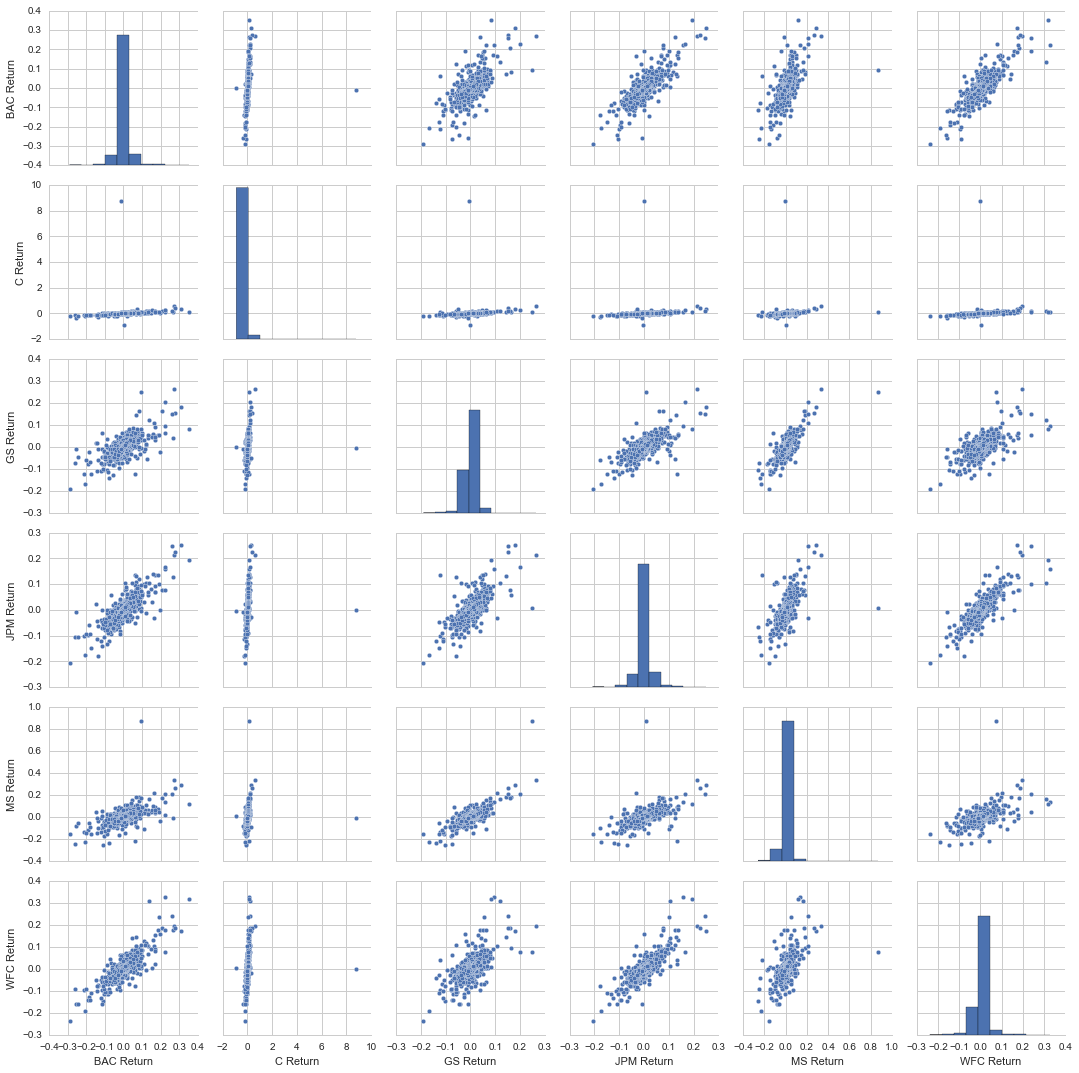

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [67]:
returnz.idxmin()

JCI Returns    2008-10-08
KLCI Returns   2008-03-10
NZ50 Returns   2008-10-16
SHC Returns    2007-02-27
STI Returns    2008-10-24
TWSE Returns   2008-01-22
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [68]:
returnz.idxmax()

JCI Returns    2008-01-23
KLCI Returns   2007-08-20
NZ50 Returns   2008-10-14
SHC Returns    2008-09-19
STI Returns    2008-10-30
TWSE Returns   2009-04-30
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [69]:
returnz.std()

JCI Returns     0.013953
KLCI Returns    0.007555
NZ50 Returns    0.006995
SHC Returns     0.017294
STI Returns     0.011585
TWSE Returns    0.012198
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [78]:
returnz.loc['2015-01-01':'2015-12-31'].std()

JCI Returns     0.010583
KLCI Returns    0.006815
NZ50 Returns    0.005201
SHC Returns     0.023701
STI Returns     0.007696
TWSE Returns    0.009317
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

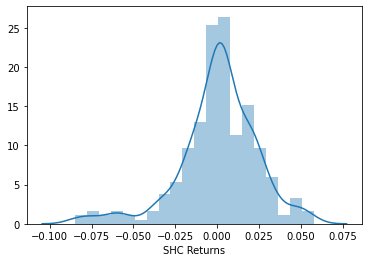

In [86]:
sns.distplot(returnz['SHC Returns'].loc['2015-01-01':'2015-12-31'],bins=20)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

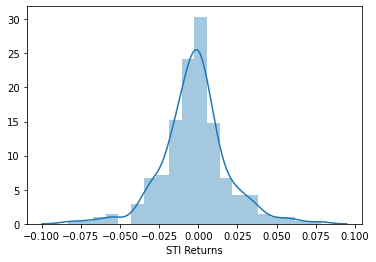

In [89]:
sns.distplot(returnz['STI Returns'].loc['2008-01-01':'2008-12-31'],bins=20)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



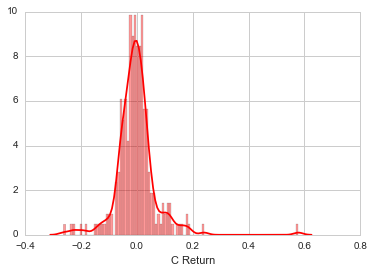

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

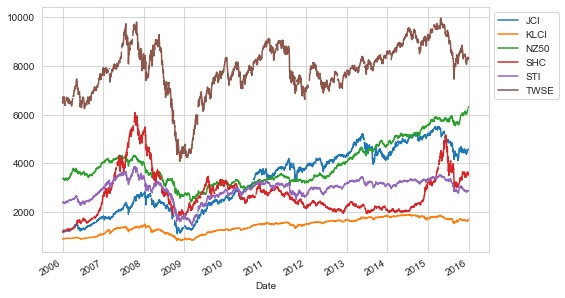

In [111]:
bank_stocks.xs(key="Close",axis=1,level='Stock Info').plot(figsize=(8,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))


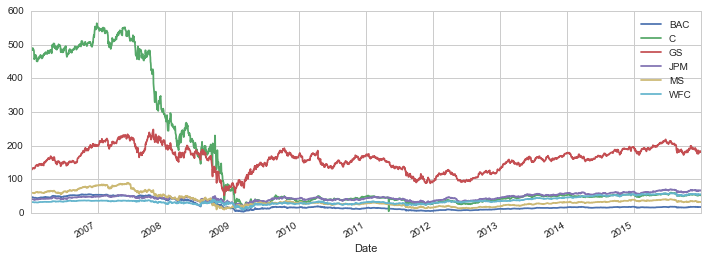

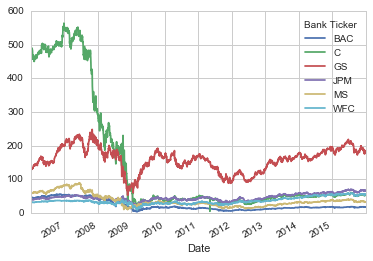

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

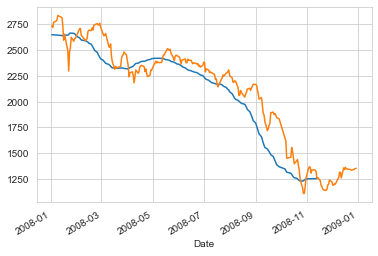

In [158]:
JCI['Close'].loc['2009-01-01':'2008-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
JCI['Close'].loc['2009-01-01':'2008-01-01'].plot(label='JCI CLOSE')


** Create a heatmap of the correlation between the stocks Close Price.**

In [167]:
new = pd.DataFrame()

In [169]:
for tick in tickers:
    new[tick + 'Close'] = bank_stocks[tick]['Close']

In [170]:
new

,JCIClose,KLCIClose,NZ50Close,SHCClose,STIClose,TWSEClose
Date,,,,,,
2006-01-02,1171.71,NaN,NaN,NaN,NaN,6462.06
2006-01-03,1184.69,892.85,NaN,NaN,2369.37,6591.77
2006-01-04,1211.70,897.13,3374.46,1180.96,2384.13,6616.44
2006-01-05,1211.00,906.66,3375.98,1197.27,2403.75,6709.87
2006-01-06,1222.25,911.67,3364.97,1209.42,2420.74,6694.82
...,...,...,...,...,...,...
2015-12-25,NaN,NaN,NaN,3627.91,NaN,8363.28
2015-12-28,4557.35,1670.73,NaN,3533.78,2875.32,8358.49
2015-12-29,4569.36,1685.36,6292.44,3563.74,2888.22,8274.69


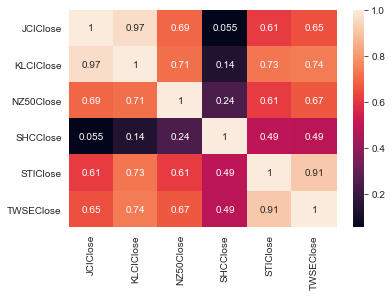

In [176]:
sns.heatmap(new.corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

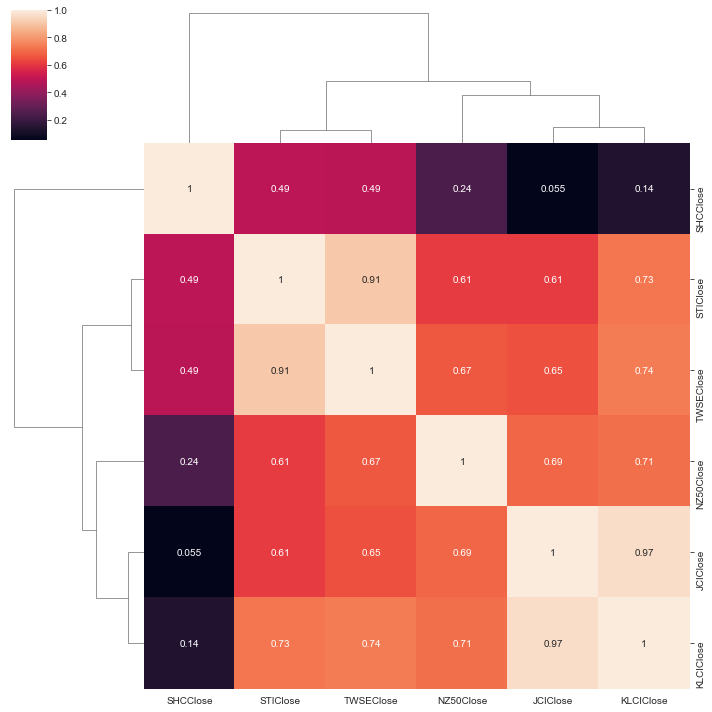

In [179]:
sns.clustermap(new.corr(),annot=True)

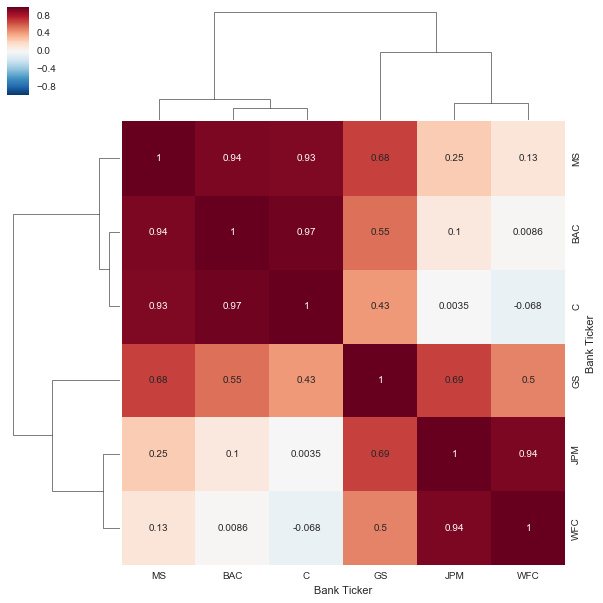

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [184]:
JCI[['Open', 'High', 'Low', 'Close']].loc['2016-01-01':'2015-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [191]:
STI['Close'].loc['2015-12-31':'2015-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [192]:
STI['Close'].loc['2015-12-31':'2015-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.